In [18]:
# Import libraries

# Pandas 
import pandas as pd
from pandas import Series,DataFrame 

# Numpy and Matplotlib
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
#sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning 
from sklearn import preprocessing

In [63]:
# Get Data in Dataframe 
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

# 1.	Exploratory data Analysis

In [53]:
#1.	Exploratory data Analysis

train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [54]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

# 2.	Visualization

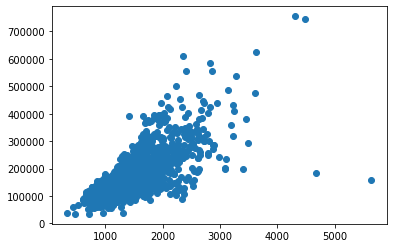

In [57]:
#2.	Visualization
plt.scatter(train["GrLivArea"], train['SalePrice'])
plt.show()

# 3.	Data Preprocessing

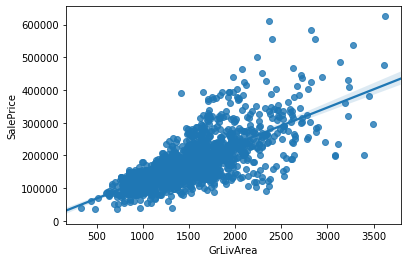

In [64]:
#3.	Data Preprocessing
#Removing outliers
train = train[train['GrLivArea'] < 4000]
sns.regplot(x='GrLivArea',y='SalePrice',data=train)

In [65]:
#Removing the null values
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

Null Count
Feature                 
PoolQC              1451
MiscFeature         1402
Alley               1365
Fence               1176
FireplaceQu          690
LotFrontage          259
GarageCond            81
GarageType            81
GarageYrBlt           81
GarageFinish          81
GarageQual            81
BsmtExposure          38
BsmtFinType2          38
BsmtFinType1          37
BsmtCond              37
BsmtQual              37
MasVnrArea             8
MasVnrType             8
Electrical             1
Utilities              0
YearRemodAdd           0
MSSubClass             0
Foundation             0
ExterCond              0
ExterQual              0

# 4.	Model Fitting

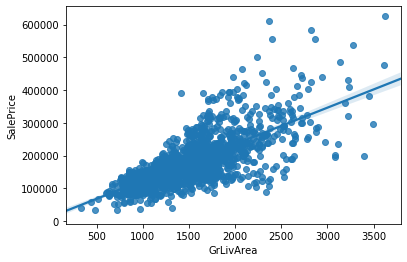

In [66]:
#4.	Model Fitting
sns.regplot(x='GrLivArea',y='SalePrice',data=train)

# 5.	Prediction

In [67]:
#5.	Prediction
data = train.select_dtypes(include=[np.number]).interpolate().dropna()
sum(data.isnull().sum() != 0)
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)
from sklearn import linear_model
from sklearn import ensemble
lr = ensemble.GradientBoostingRegressor()
model = lr.fit(X_train, y_train)


predictions = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.018612496196776542


Text(0.5, 1.0, 'Linear Regression Model')

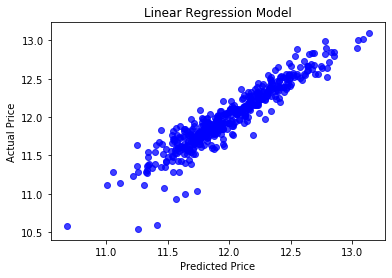

In [68]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
#pltrandom_state=None.show()

# 6.	Evaluation

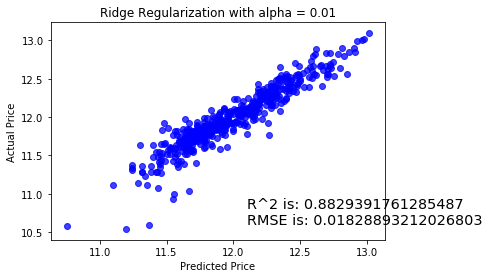

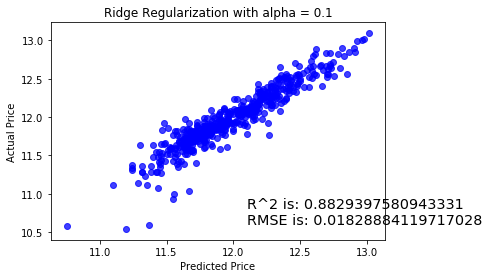

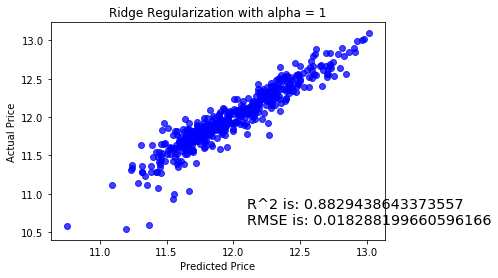

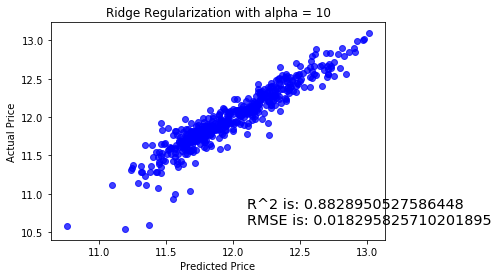

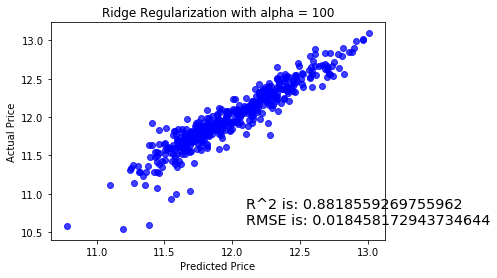

In [69]:
#6.	Evaluation
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [53]:
import numpy as np 
  
# function to print Checkerboard pattern 
def printcheckboard(n): 
      
    print("Checkerboard pattern:") 
    # create a n * n matrix 
    x = np.zeros((n, n), dtype = int) 
    # fill with 1 the alternate rows and columns 
    x[::1, ::7] = 1
    x[::7, ::1] = 1
 #   x[1::2, 1::2] = 1
  #  x[::2, 1::2] = 0
    
 #   x[1::2,::2] = 1
  #  x[::2,1::2] = 1
      
    # print the pattern 
    for i in range(n): 
        for j in range(n): 
            print(x[i][j], end =" ")  
        print()  
  
# driver code 
n = 8
printcheckboard(n)

Checkerboard pattern:
1 1 1 1 1 1 1 1 
1 0 0 0 0 0 0 1 
1 0 0 0 0 0 0 1 
1 0 0 0 0 0 0 1 
1 0 0 0 0 0 0 1 
1 0 0 0 0 0 0 1 
1 0 0 0 0 0 0 1 
1 1 1 1 1 1 1 1 


In [64]:
def test():
    for num in range (100):
        if(num%2==0 or num%3==0):
            print(num)
test()


0
2
3
4
6
8
9
10
12
14
15
16
18
20
21
22
24
26
27
28
30
32
33
34
36
38
39
40
42
44
45
46
48
50
51
52
54
56
57
58
60
62
63
64
66
68
69
70
72
74
75
76
78
80
81
82
84
86
87
88
90
92
93
94
96
98
99


In [69]:
i=0
while(True):
    print(i)
    i+=1
    if(i==3):
        break
    

0
1
2


In [98]:

  
import numpy as np 
  

def printmatrix(): 
      
    rows= int(input("Enter number of rows : "))
    print(rows)
    cols= int(input("Enter number of Coulumns : "))
    print(cols)
    x = np.zeros((rows, cols), dtype = int) 
    
    if(rows%2==0&cols%2==0):
    
 
       
   
        x[::1, rows-1::rows] = 1
        x[::1, rows-2::rows] = 1
        x[4::cols, ::1] = 1
        x[3::cols, ::1] = 1
  
    elif(rows%2!=0&cols%2!=0):
      
 
        x[::1, 4::rows] = 1
  
        x[4::cols, ::1] = 1
      
      
    # print the pattern 
    for i in range(rows): 
        for j in range(rows): 
            print(x[i][j], end =" ")  
        print()  
  
# driver code 
#n = 8
printmatrix() 


Enter number of rows : 8
8
Enter number of Coulumns : 8
8
0 0 0 0 0 0 1 1 
0 0 0 0 0 0 1 1 
0 0 0 0 0 0 1 1 
1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 
0 0 0 0 0 0 1 1 
0 0 0 0 0 0 1 1 
0 0 0 0 0 0 1 1 


In [102]:
import numpy as np

#accepting input values
while True:
    d1 = int(input('Enter the dim1:'))
    d2 = int(input('Enter the dim2:'))
    
    #The condition for number range
    if (d1 <5) or (d1 >20) or (d2 <5) or (d2 >20):
        print ('choose between 5 to 20')
        
    else:
        break


array1 = np.zeros((d1, d2))

x= int(d1/2)
y = int(d2/2)

#if dimension one is even number
if (d1%2 == 0):
    array1[x-1:x+1,:] = 1
else:
    array1[x,:] = 1
    
#if dimension 2 is even number   
if (d2%2 == 0):
    array1[:,y-1:x+1] = 1
else:
    array1[:,y] = 1
        
    
print(array1)

Enter the dim1:8
Enter the dim2:8
[[0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0.]]
